In [14]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
def CPEfun(Rx, Qx, px, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = 1./(1./Rx + Qx*(np.pi*2*freq*1j)**px)
    return out

def CPEfunElec(Rx, Qx, pex, pix, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = 1./(1./Rx + (1j)**pix*Qx*(np.pi*2*freq)**pex)
    return out

def CPEfunSeries(Rx, Qx, px, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = Rx + 1./(Qx*(np.pi*2*freq*1j)**px)
    return out

In [3]:
pathforPK = "/Users/sgkang/Google Drive/Zarcfit/nt01213a.z"
pathfordata = "../data/Kimberlite-2015-07-17.xls"
temp = np.loadtxt(pathforPK, skiprows=11, delimiter=",")
frequency = temp[:,0].copy()
data = pd.read_excel(pathfordata)
data_active = data.loc[np.logical_and((data['Facies'] == 'XVK')|(data['Facies'] == 'PK')|(data['Facies'] == 'HK')|(data['Facies'] == 'VK'), data.notnull()['Rinf']==True)][["Facies", "0LabID (PCG)", "Peregrine ID", "(Latitude)", "(Longitude)", "Depth (m)","Mag Susc [SI]","Resistivity [Ohm.m]","Geometric Factor [m]","Sat Geometric Dens [g/cc]","Chargeability [ms]","Rinf","Ro","Rh","Qh","Ph", "Fh","pRh", "pQh","Rm","Qm","Pm", "pRm", "pQm","Rl","Ql","Pl", "Fl", "pRl", "pQl","Re","Qe","Pe-f","Pe-i"]]

In [13]:
data_active[data['Facies'] == 'HK']

,Facies,0LabID (PCG),Peregrine ID,(Latitude),(Longitude),Depth (m),Mag Susc [SI],Resistivity [Ohm.m],Geometric Factor [m],Sat Geometric Dens [g/cc],...,Rl,Ql,Pl,Fl,pRl,pQl,Re,Qe,Pe-f,Pe-i
7,HK,NT01204,K1P-0535,NaN,NaN,135.1,0.013182,10090.413234,0.022235,2.674294,...,578400,7.246e-07,0.177,21.65,36980,6.445e-07,10000000000,0.0001862,0.4612,0.752
9,HK,NT01205,K1P-0540,NaN,NaN,163.8,0.006001,2204.463074,0.022346,2.759935,...,47360,8.84e-06,0.1809,19.61,151700,1.59e-06,10000000000,0.007566,0.4576,0.7399
19,HK,NT01210,K1P-0591,64.326044,-109.812725,122.4,0.001167,47.798493,0.026205,2.385503,...,395,4.273e-05,0.4269,2263,6645,1.992e-06,10000000000,0.001293,0.9516,0.7104
21,HK,NT01211,K1P-0593,64.326044,-109.812725,135.4,0.004224,17612.473012,0.021637,2.608411,...,216600,5.428e-07,0.2842,296.7,2370000,3.672e-08,10000000000,5.736e-05,0.941,1.935
23,HK,NT01212,K1P-0595,64.326044,-109.812725,176.6,0.009333,572.919007,0.021410,2.644475,...,7429,0.0001171,0.1597,0.3807,91680,7.145e-06,10000000000,0.005917,0.5388,-0.1475


In [5]:
labid = 'NT01213'

In [6]:
R0 = data_active[data['0LabID (PCG)'] == labid]['Ro'].values[0]
Rinf = data_active[data['0LabID (PCG)'] == labid]['Rinf'].values[0]
Rh = data_active[data['0LabID (PCG)'] == labid]['Rh'].values[0]
Qh = data_active[data['0LabID (PCG)'] == labid]['Qh'].values[0]
pRh = data_active[data['0LabID (PCG)'] == labid]['pRh'].values[0]
pQh = data_active[data['0LabID (PCG)'] == labid]['pQh'].values[0]
Ph = data_active[data['0LabID (PCG)'] == labid]['Ph'].values[0]
Fh = data_active[data['0LabID (PCG)'] == labid]['Fh'].values[0]
Rl = data_active[data['0LabID (PCG)'] == labid]['Rl'].values[0]
Ql = data_active[data['0LabID (PCG)'] == labid]['Ql'].values[0]
pRl = data_active[data['0LabID (PCG)'] == labid]['pRl'].values[0]
pQl = data_active[data['0LabID (PCG)'] == labid]['pQl'].values[0]
Pl = data_active[data['0LabID (PCG)'] == labid]['Pl'].values[0]
Re = data_active[data['0LabID (PCG)'] == labid]['Re'].values[0]
Qe = data_active[data['0LabID (PCG)'] == labid]['Qe'].values[0]
Pef = data_active[data['0LabID (PCG)'] == labid]['Pe-f'].values[0]
Pei = data_active[data['0LabID (PCG)'] == labid]['Pe-i'].values[0]

/Users/sgkang/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [7]:
obs = temp[:,4]+1j*temp[:,5]

In [8]:
def fitfun(R0, Rh, Qh, Ph, Rl, Ql, Pl, Re, Qe, Pef, Pei,plottype="realimag"):
    Zh = CPEfunSeries(Rh, Qh, Ph, frequency)
    Zl = CPEfunSeries(Rl, Ql, Pl, frequency)
    Ze = CPEfunElec(Re, Qe, Pef, Pei, frequency)
    pred = 1./(1./R0+1./Zh+1./Zl)+Ze

    fig = plt.figure(figsize = (14, 4))
#     fig.patch.set_facecolor('black')
    ax = plt.subplot(121)
    ax1 = plt.subplot(122)
    ax.patch.set_facecolor('black')
    ax1.patch.set_facecolor('black')
    if plottype=="realimag":
        ax.loglog(frequency, obs.real, 'lime', lw=3, marker=".", ms=8)
        ax1.loglog(frequency, abs(obs.imag), 'lime', lw=3, marker=".", ms=8)
        ax.loglog(frequency, pred.real, 'deepskyblue', lw=2)
        ax1.loglog(frequency, abs(pred.imag), 'deepskyblue', lw=2)
        ax.set_ylabel("Real (Ohm)")
        ax.set_xlabel("Frequency (Hz)")
        ax1.set_ylabel("Imaginary (Ohm)")
        ax1.set_xlabel("Frequency (Hz)")
        
        ax.invert_xaxis()
        ax1.invert_xaxis()
        ax.set_ylim(obs.real.min(), obs.real.max())
        ax1.set_ylim(abs(obs.imag).min(), abs(obs.imag).max())        
    elif plottype=="ampphase":
        amp = np.sqrt(obs.real**2+obs.imag**2)
        phase = np.arctan2(obs.real, obs.imag)
        ax.loglog(frequency, amp, 'lime', lw=3, marker=".", ms=8)
        ax1.loglog(frequency, phase, 'lime', lw=3, marker=".", ms=8)
        ax.loglog(frequency, abs(pred), 'deepskyblue', lw=2)
        ax1.loglog(frequency, np.arctan2(pred.real, pred.imag), 'deepskyblue', lw=2)
        ax.invert_xaxis()
        ax1.invert_xaxis()
        ax.set_ylim(amp.min(), amp.max())
        ax1.set_ylim(phase.min(), phase.max())       
        ax.set_ylabel("Amplitude (Ohm)")
        ax.set_xlabel("Frequency (Hz)")
        ax1.set_ylabel("Phase (rad)")
        ax1.set_xlabel("Frequency (Hz)")
        
    elif plottype=="zarc":        
        amp = np.sqrt(obs.real**2+obs.imag**2)
        amp_pred = np.sqrt(pred.real**2+pred.imag**2)
        ax.plot(obs.real, -obs.imag, 'lime', lw=3, marker=".", ms=8)
        ax.plot(pred.real, -pred.imag, 'deepskyblue', lw=2)
        ax1.semilogx(frequency[1:]*0.5+frequency[0:-1]*0.5, diff(np.log10(amp))/diff(np.log10(frequency)), 'lime', lw=3, marker=".", ms=8)
        ax1.semilogx(frequency[1:]*0.5+frequency[0:-1]*0.5, diff(np.log10(amp_pred))/diff(np.log10(frequency)), 'deepskyblue', lw=2)
        ax.set_xlim(obs.real.min(), obs.real.max())
        ax.set_ylim((-obs.imag).min(), (-obs.imag).max())
        ax.set_xlabel("Real (Ohm)")
        ax.set_ylabel("- Imaginary (Ohm)")
        ax1.set_xlabel("Frequency")
        ax1.set_ylabel("dlog(Amp)/dlog(Freq)")
        
        
    ax.grid(True)

    ax.yaxis.grid(True, which='minor')
    plt.tick_params(axis='y', which='minor')
    ax1.grid(True)
    ax1.yaxis.grid(True, which='minor')
    plt.tick_params(axis='y', which='minor')
#     ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
#     ax1.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
    
    leg = ax1.legend(("Observed", "Predicted"), fontsize = 12, bbox_to_anchor = (1.4, 1))
    for text in leg.get_texts():
        plt.setp(text, color = 'k')
    plt.show()
    return True

In [9]:
from matplotlib.ticker import FormatStrFormatter
# ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))

In [10]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams.update({'grid.color': 'white', 'grid.linewidth':1})

In [11]:
from IPython.html.widgets import interact, FloatText, FloatSlider, ToggleButtons

/Users/sgkang/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


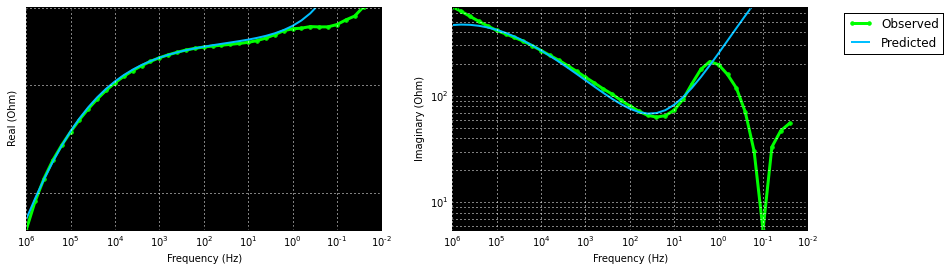

True

In [21]:
interact(fitfun, R0=FloatText(value=R0),\
    Rh=FloatSlider(description="$R_h$", min = 1, max = 10000., step = 100, value=pRh, readout=True), 
    Qh=FloatText(value=pQh), 
    Ph=FloatSlider(min = 0.1, max = 1., step = 0.02, value=Ph),
    Rl=FloatSlider(min = 1, max = 10000., step = 100, value=Rl), 
    Ql=FloatText(value=pQl), 
    Pl=FloatSlider(min = 0.1, max = 1., step = 0.02, value=Pl),
    Re=FloatSlider(min = 1, max = 10000., step = 100, value=Re), 
    Qe=FloatText(value=Qe), 
    Pef=FloatSlider(min = 0.1, max = 1., step = 0.02, value=Pef), 
    Pei=FloatSlider(min = 0.1, max = 1., step = 0.02, value=Pei),
    plottype=ToggleButtons(options=['realimag','ampphase', 'zarc'])) 